In [390]:
 path_ = [
      [0.00359, -0.0013],   [0.00608, -0.00281],  [0.00756, -0.0027],
      [0.00842, -0.00307],  [0.00849, -0.0037],   [0.00846, -0.00387],
      [0.00829, -0.00379],  [0.0084, -0.00388],   [0.00846, -0.00409],
      [0.0138, -0.00347],   [0.0698, -0.00098],   [0.11151, -0.00745],
      [0.167, -0.01404],    [0.32572, -0.05356],  [0.41797, -0.07953],
      [0.52867, -0.11505],  [0.61002, -0.13945],  [0.63633, -0.14954],
      [0.70933, -0.18835],  [0.7191, -0.19822],   [0.72701, -0.20117],
      [0.731, -0.20424],    [0.73371, -0.20805],  [0.77746, -0.2621],
      [0.86029, -0.34734],  [0.88373, -0.37565],  [0.90413, -0.40655],
      [0.92189, -0.43795],  [0.93867, -0.47125],  [0.95337, -0.50479],
      [0.96615, -0.54003],  [0.97729, -0.57518],  [0.98669, -0.60948],
      [0.9944, -0.64442],   [0.99963, -0.67999],  [1.00244, -0.71709],
      [1.00327, -0.75302],  [0.99907, -0.78939],  [0.99464, -0.8237],
      [0.98722, -0.86223],  [0.97558, -0.90511],  [0.96147, -0.94947],
      [0.94402, -0.99336],  [0.92286, -1.03964],  [0.89779, -1.08594],
      [0.8698, -1.13096],   [0.73009, -1.33175],  [0.59053, -1.5304],
      [0.46166, -1.7128],   [0.30239, -1.93285],  [0.25147, -1.99011],
      [0.19826, -2.04254],  [0.14275, -2.09163],  [0.08663, -2.13425],
      [0.03116, -2.17209],  [-0.0238, -2.20402],  [-0.07864, -2.23286],
      [-0.1318, -2.25636],  [-0.1825, -2.27552],  [-0.23171, -2.29113],
      [-0.27795, -2.30206], [-0.32673, -2.31054], [-0.37225, -2.31536],
      [-0.41574, -2.31996], [-0.45496, -2.32042], [-0.48902, -2.31757],
      [-0.52496, -2.3164],  [-0.55811, -2.31102], [-0.77049, -2.25292],
      [-0.99, -2.19669],    [-1.19266, -2.14085], [-1.23428, -2.12438],
      [-1.27377, -2.10614], [-1.31327, -2.08351], [-1.39679, -2.03016],
      [-1.48345, -1.95929], [-1.52353, -1.91628], [-1.66757, -1.77012],
      [-1.83468, -1.60606], [-2.01648, -1.41688], [-2.18845, -1.20596],
      [-2.35403, -0.99207], [-2.44666, -0.84068], [-2.48383, -0.76261],
      [-2.51504, -0.68854], [-2.53995, -0.61543], [-2.56026, -0.54313],
      [-2.57583, -0.47095], [-2.58632, -0.40214], [-2.5929, -0.33388],
      [-2.59584, -0.2669],  [-2.5965, -0.20323],  [-2.59088, -0.13817],
      [-2.58415, -0.07689], [-2.57404, -0.0163],  [-2.55813, 0.04199],
      [-2.5374, 0.10109],   [-2.51245, 0.15825],  [-2.48738, 0.21222],
      [-2.45803, 0.26488],  [-2.42471, 0.314],    [-2.38647, 0.36297],
      [-2.3471, 0.40819],   [-2.30357, 0.45124],  [-2.1598, 0.59651],
      [-1.99623, 0.75884],  [-1.84116, 0.91525],  [-1.68546, 1.07255],
      [-1.57778, 1.17373]];

In [391]:
import numpy as np
import matplotlib.pyplot as plt

1. It's assumed that the robot starts from at initial point of the path => x0 = [0.00359, -0.0013]
2. It's assumed that the robot has a "squared footprint" <--> moves only along the edeges of a grid <br>
    &nbsp;=> grid_step = 0.01
3. The area is assumed to be computed as the number of grid elements that are occupied while following the path

In [402]:

class Robot:
    def __init__(self,path_, footprint_size):
        self.path = path_
        self.pos = [0,0]
        self.target = path_[0]
        
        self.step_grid = footprint_size
        self.area = self.step_grid**2
        self.n_wp = 0
        
        
        self.UP = [float(.0) * self.step_grid,float(1.0) * self.step_grid] 
        self.RIGHT = [float(1.0)* self.step_grid,float(0.)* self.step_grid]
        self.DOWN = [float(.0) * self.step_grid,float(-1.0) * self.step_grid] 
        self.LEFT = [float(-1.0)* self.step_grid,float(0.)* self.step_grid]
        
        self.MOVESDIC = { 'UP': ("▲", self.UP),
                          'RIGHT': ("►", self.RIGHT),
                          'DOWN':("▼",self.DOWN),
                          'LEFT':("◄",self.LEFT)
                        }
        self.MOVES = []
       
        
            
     
        
    def reach_next_point(self):
        
        while abs(self.target[0]- self.pos[0]) >= self.step_grid  or abs(self.target[1]- self.pos[1]) >= self.step_grid:
            
            #move right/left => lateral motion  evaluated first
            if self.target[0] >= self.pos[0] + self.step_grid:
                self.pos[0] += self.RIGHT[0]
                self.pos[1] += self.RIGHT[1]
                self.area += self.step_grid**2
                
                self.MOVES.append(self.MOVESDIC['RIGHT'])
             
                
            elif self.target[0] <= self.pos[0] - self.step_grid:
                self.pos[0] += self.LEFT[0]
                self.pos[1] += self.LEFT[1]
                self.area += self.step_grid**2

                self.MOVES.append(self.MOVESDIC['LEFT'])
               
                                  
            else:
                pass
            
            #move up/down
            if self.target[1] >= self.pos[1] + self.step_grid:
                self.pos[0] += self.UP[0]
                self.pos[1] += self.UP[1]
                self.area += self.step_grid**2

                self.MOVES.append(self.MOVESDIC['UP'])
               
                                  
            elif self.target[1] <= self.pos[1] - self.step_grid:
                self.pos[0] += self.DOWN[0]
                self.pos[1] += self.DOWN[1]
                self.area += self.step_grid**2

                self.MOVES.append(self.MOVESDIC['DOWN'])
               
            else:
                pass
            
        #print("POSES UNTIL NOW:",self.POSES_)
        
        if self.n_wp +1 <= len(self.path)-1:
            self.n_wp +=1
            self.target = self.path[self.n_wp]
        
        
    def follow_path(self):
        for _ in self.path:
            self.reach_next_point()
    
            
        print("path followed!!!")
            
                                  
    def recap(self):
        print([mv[0] for mv in self.MOVES])
        print("Total area: ", self.area)
        print("Final position: ", self.pos, "Final path position:", self.path[-1])
        
        fig = plt.figure(figsize=(20,10))
        ax = fig.add_subplot(1, 1, 1)
        x_plot = self.path[:,0]
        y_plot = self.path[:,1]
        x_robot =  []
        y_robot =  []
        xc = 0
        yc = 0
        
        for mv in self.MOVES:
            x_robot.append(xc)
            xc += mv[1][0]
            
            y_robot.append(yc)
            yc += mv[1][1]
        
        plt.scatter(x_plot, y_plot)
        #plt.plot(x_plot,y_plot)
        plt.plot(x_robot,y_robot,"r-")
        #ax.grid(which='minor', alpha=0.2, linestyle='--')
        #plt.grid()
        plt.show()
        
        
            
    

path followed!!!
['►', '▼', '►', '►', '►', '▼', '►', '►', '►', '►', '▼', '▼', '►', '►', '►', '►', '►', '►', '▲', '►', '▲', '►', '▲', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►

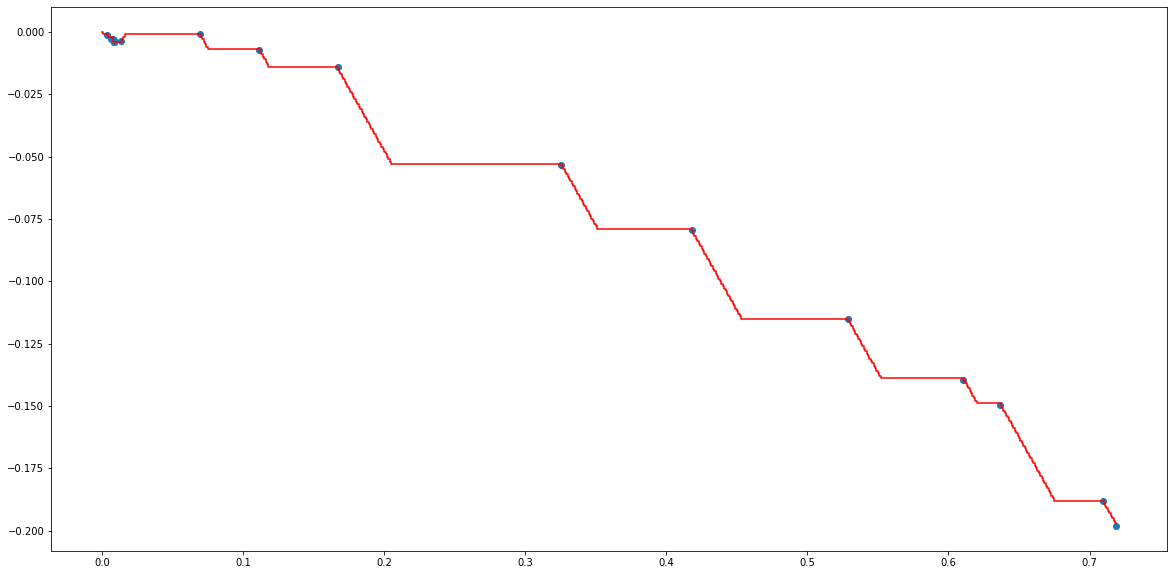

In [403]:
rob_test1 = Robot(path[:20], 0.001)
rob_test1.follow_path()
rob_test1.recap()

path followed!!!
['►', '▼', '►', '►', '►', '▼', '►', '►', '►', '►', '▼', '▼', '►', '►', '►', '►', '►', '►', '▲', '►', '▲', '►', '▲', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►', '▼', '►

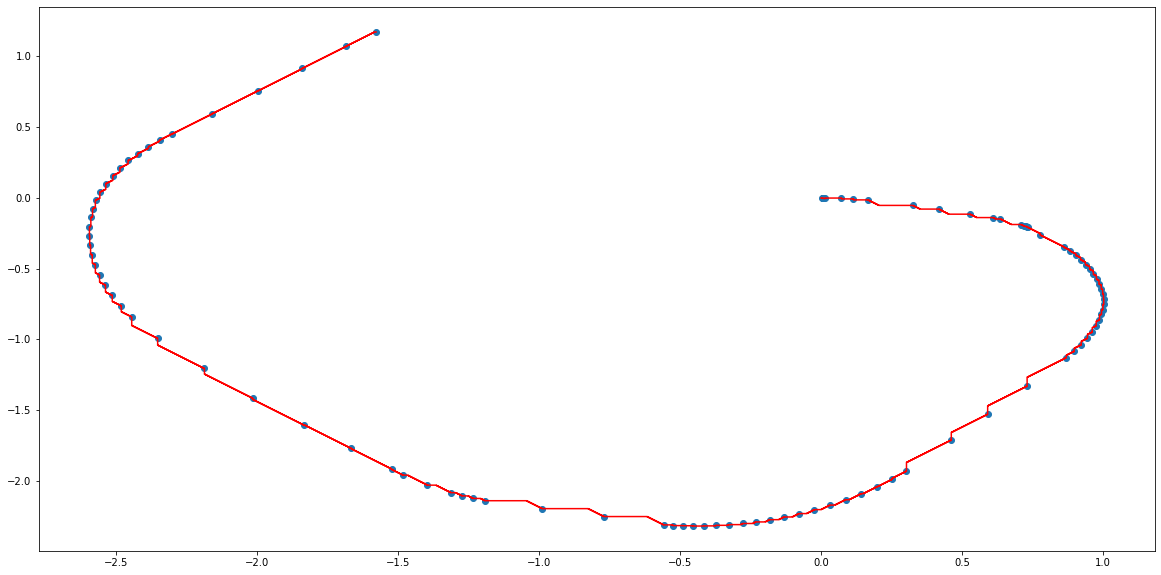

In [404]:
rob_test_full = Robot(path, 0.001)
rob_test_full.follow_path()
rob_test_full.recap()